In [12]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
import pandas as pd
import shutil

In [13]:
base_dir="/home/adesh/Pictures/dogs-vs-cats/train"

In [14]:
validation_dir=os.path.join("/home/adesh/Pictures/dogs-vs-cats","validation")

In [ ]:
os.mkdir(validation_dir)

In [15]:
train_cat_dir=os.path.join(base_dir,"cat")
train_dog_dir=os.path.join(base_dir,"dog")

In [16]:
vali_cat_dir=os.path.join(validation_dir,"cat")
vali_dog_dir=os.path.join(validation_dir,"dog")

In [ ]:
os.mkdir(vali_cat_dir)
os.mkdir(vali_dog_dir)

In [ ]:
os.mkdir(train_cat_dir)

In [ ]:
os.mkdir(train_dog_dir)

In [ ]:
for i in os.listdir(base_dir):
    if(i.startswith("cat") and i.endswith(".jpg")):
        src=os.path.join(base_dir,i)
        dst=os.path.join(train_cat_dir,i)
        shutil.copyfile(src,dst)
    elif(i.startswith("dog") and i.endswith(".jpg")):
        src=os.path.join(base_dir,i)
        dst=os.path.join(train_dog_dir,i)
        shutil.copyfile(src,dst)

In [ ]:
for i in os.listdir(train_cat_dir)[:500]:
        src=os.path.join(train_cat_dir,i)
        dst=os.path.join(vali_cat_dir,i)
        shutil.copyfile(src,dst)
        os.remove(src)
for i in os.listdir(train_dog_dir)[:500]:
        src=os.path.join(train_dog_dir,i)
        dst=os.path.join(vali_dog_dir,i)
        shutil.copyfile(src,dst)
        os.remove(src)

In [6]:
print(tf.__version__)

2.0.0


# DATA EXPLORATION

In [17]:
"No of images to plot"
n=4

In [18]:
choice1=["cat","dog"]
choice2=[i for i in range(12500)]
c=np.random.choice(choice1,n)
j=np.random.choice(choice2,n)

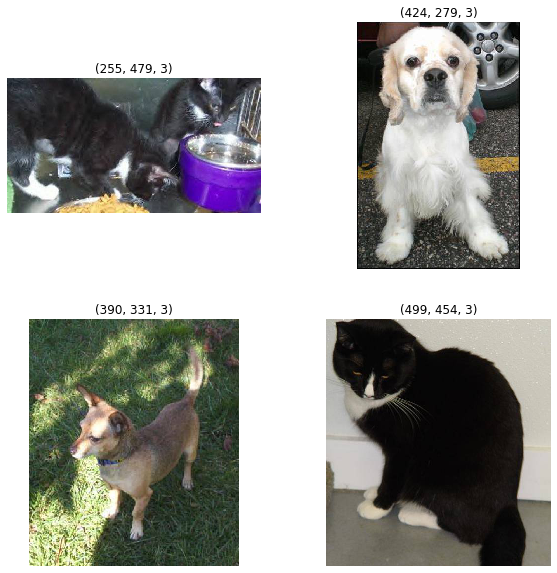

In [19]:
plt.figure(figsize=(10,10))
for i in range(n):
    if(c[i]=="cat"):
        src=train_cat_dir
    else:
        src=train_dog_dir
    im=plt.imread(os.path.join(src,"{0}.{1}.jpg".format(c[i],j[i])))
    plt.subplot(2,2,i+1)
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis("off")

In [20]:
cats=len(os.listdir(train_cat_dir))
print("No of cats images",cats)
dogs=len(os.listdir(train_dog_dir))
print("No of dogs images",dogs)

No of cats images 12000
No of dogs images 12000


# DATA PREPROCESSING

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#standardization (0,255) --> (0,1),data augmentation on fly without saving on disk in this adding horizonta flip
#vertical flip, rotation of each image at 45 deg

In [22]:
datagen=ImageDataGenerator(rescale=1/255.,rotation_range=45,horizontal_flip=True,vertical_flip=True)

"DATA IS ALREADY SPLITED IN TRAIN AND TEST DATA CONTAINING 12500 IMGAES INCLUDING BOTH DOGS AND CATS"

In [23]:
len(os.listdir(os.path.join("/home/adesh/Pictures/dogs-vs-cats/","test")))

12500

In [24]:
test_dir=os.path.join("/home/adesh/Pictures/dogs-vs-cats/","test")

(-0.5, 499.5, 345.5, -0.5)

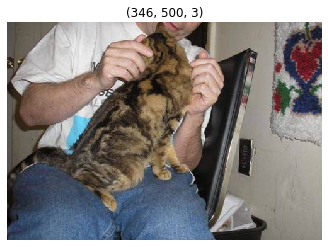

In [25]:
p=np.random.choice(range(1250),1)
im=plt.imread(os.path.join(test_dir,"{0}.jpg".format(p[0])))
plt.imshow(im)
plt.title(im.shape)
plt.axis("off")

In [ ]:
#Images after preprocessing

In [26]:
train_gen=datagen.flow_from_directory(base_dir,
                                      target_size=(150,150),
                                      class_mode="categorical",#one hot encoding for categorical data
                                      batch_size=60,
                                      shuffle=True)

Found 24000 images belonging to 2 classes.


In [27]:
vali_gen=datagen.flow_from_directory(validation_dir,
                                      target_size=(150,150),
                                      class_mode="categorical",#one hot encoding for categorical data
                                      batch_size=50,
                                      shuffle=True)

Found 1000 images belonging to 2 classes.


In [ ]:
#due to data augmentation might be train images are different from original 
#horizontally flipped rotated at 45 deg

[1. 0.]
[0. 1.]
[1. 0.]
[1. 0.]


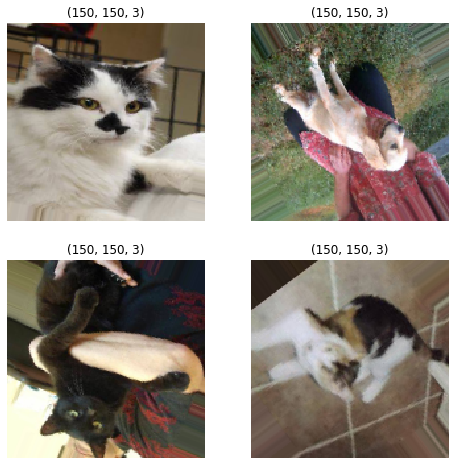

In [28]:
p=np.random.choice(range(20),4)
plt.figure(figsize=(8,8))
for i in train_gen:
    c=1
    for j in p:
        plt.subplot(2,2,c)
        plt.imshow(i[0][j])
        print(i[1][j])
        plt.title(i[0][j].shape)
        plt.axis("off")
        c=c+1
    break

# DATA ANALYSIS

In [19]:
from tensorflow.keras.models import Model

In [20]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,SeparableConv2D,BatchNormalization,Input

In [21]:
from tensorflow.keras.layers import Activation

In [22]:
from tensorflow.keras.layers import Flatten,Dense

In [23]:
Inp=Input(shape=(150,150,3),name="Inp")

In [41]:
x=Conv2D(32,(3,3))(Inp)
x=BatchNormalization()(x)
x=Activation("relu")(x)
x=MaxPooling2D()(x)
x=Conv2D(64,(5,5))(x)
x=BatchNormalization()(x)
x=Activation("relu")(x)
x=MaxPooling2D()(x)
x=SeparableConv2D(128,(3,3))(x)
x=BatchNormalization()(x)
x=Activation("relu")(x)
x=MaxPooling2D()(x)
x=SeparableConv2D(256,(5,5))(x)
x=BatchNormalization()(x)
x=Activation("relu")(x)
x=MaxPooling2D()(x)
x=Flatten()(x)
x=Dense(256)(x)
out=Dense(2,activation="softmax",name="out")(x)

In [42]:
my_model=Model(inputs=Inp,outputs=out)

In [43]:
my_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inp (InputLayer)             [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
activation_8 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 70, 70, 64)        51264     
_________________________________________________________________
batch_normalization_9 (Batch (None, 70, 70, 64)        256 

In [27]:
from tensorflow.keras.utils import plot_model

In [28]:
#plot_model(my_model,show_shapes=True) #install pydot and graphviz first

In [29]:
from tensorflow.keras.optimizers import Adam

In [45]:
my_model.compile(loss="mse",metrics=["acc"],optimizer=Adam(lr=0.01))

In [31]:
from tensorflow.keras.callbacks import LearningRateScheduler,TensorBoard,Callback,CSVLogger

In [ ]:
csv_history=CSVLogger("history")

In [32]:
lr_schedule = LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch / 5))

In [33]:
class mycallback(Callback):
    def on_epoch_end(self,epoch,logs):
        if(logs["acc"]>0.92):
            self.stop_training=True

In [34]:
from datetime import datetime
log=datetime.now().strftime("%d/%m/%Y/%H-%M-%S")

In [35]:
my_call=mycallback()

In [36]:
epochs=30

In [43]:
with tf.device("/gpu:0"):
    my_model.fit_generator(train_gen,steps_per_epoch=400,epochs=epochs,validation_data=vali_gen,validation_steps=50,callbacks=[my_call,lr_schedule.csv_history])

NameError: name 'epochs' is not defined

In [47]:
my_model.save("my_model")#tensorflow model

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_model/assets


In [48]:
my_model.save("my_model_1.h5")

# loading the pretrained model
#visulazation of loss and acc in each epoch

In [30]:
from tensorflow.keras.models import load_model

In [31]:
my_model=load_model("my_model_1.h5")

In [ ]:
train_acc=history.history["acc"]
val_acc=history.history["val_acc"]
epochs=range(1,31)
plt.plot(epoch,train_acc,labal="training")
plt.plot(epoch,val_acc,label="validation")
plt.title("accuracy")
plt.legend()

In [ ]:
train_loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(1,31)
plt.plot(epoch,train_loss,labal="training")
plt.plot(epoch,val_loss,label="validation")
plt.title("loss")
plt.legend()

In [ ]:
lr_sch= 1e-7 * 10**(np.arange(1,31)/ 5)
plt.semilogx(lr_sch,loss)
plt.plot("learning_rate vs loss")

# testing with unseen data

In [41]:
from tensorflow.keras.preprocessing.image import img_to_array,load_img

In [68]:
p=np.random.choice(range(12500),1)
im=load_img(os.path.join(test_dir,"{}.jpg".format(p[0])),target_size=(150,150,3))
im.show()
img=img_to_array(im)
img=np.expand_dims(img,axis=0)

pre=my_model.predict(img)
if(np.argmax(pre)==0):
    print("cat")
else:
    print("dog")

cat
